In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import random
import numpy as np

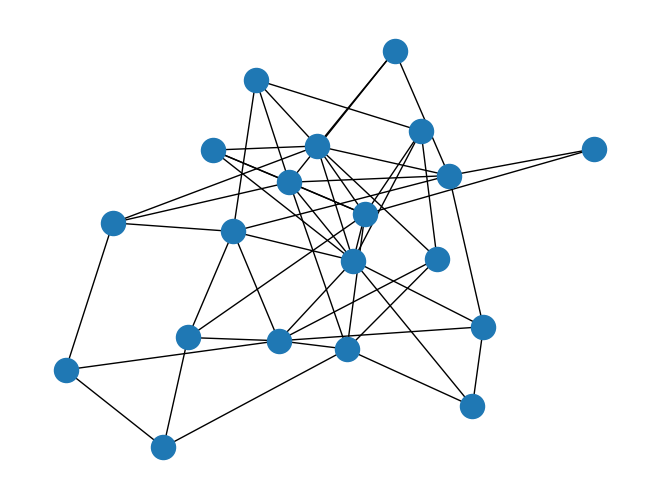

In [123]:
G = nx.gnm_random_graph(n=20, m = 50)

pos = nx.spring_layout(G)
nx.draw(G, pos)
plt.show()

In [122]:
state = []
nodes = G.nodes
for node in nodes:
    state.append((node, "S"))
print(state)
randint = np.random.randint(len(nodes))
state[randint] = (randint, "I")
print(state)
state_dict = dict(state)
print(state_dict)


[(0, 'S'), (1, 'S'), (2, 'S'), (3, 'S'), (4, 'S'), (5, 'S'), (6, 'S'), (7, 'S'), (8, 'S'), (9, 'S'), (10, 'S'), (11, 'S'), (12, 'S'), (13, 'S'), (14, 'S'), (15, 'S'), (16, 'S'), (17, 'S'), (18, 'S'), (19, 'S')]
[(0, 'S'), (1, 'S'), (2, 'S'), (3, 'S'), (4, 'S'), (5, 'S'), (6, 'S'), (7, 'S'), (8, 'S'), (9, 'S'), (10, 'S'), (11, 'S'), (12, 'S'), (13, 'S'), (14, 'S'), (15, 'I'), (16, 'S'), (17, 'S'), (18, 'S'), (19, 'S')]
{0: 'S', 1: 'S', 2: 'S', 3: 'S', 4: 'S', 5: 'S', 6: 'S', 7: 'S', 8: 'S', 9: 'S', 10: 'S', 11: 'S', 12: 'S', 13: 'S', 14: 'S', 15: 'I', 16: 'S', 17: 'S', 18: 'S', 19: 'S'}


In [110]:
nx.set_node_attributes(G, state, "state")

[0, 1, 2, 5, 7, 8, 10, 11, 12, 15, 16, 17, 18]
[3, 4, 6, 9, 13, 14, 19]


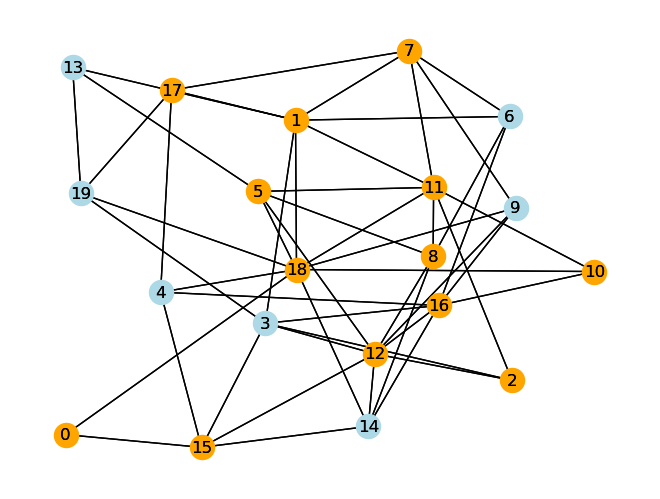

In [121]:
infected_nodes = []
susceptible_nodes = []
for key, label in state_dict.items():
    if label == "I":
        infected_nodes.append(key)
    else:
        susceptible_nodes.append(key)

print(infected_nodes)
print(susceptible_nodes)

pos = nx.spring_layout(G)
nx.draw(G, pos = pos, nodelist = infected_nodes, node_color = "orange", with_labels=True)
nx.draw(G, pos = pos, nodelist=susceptible_nodes, node_color = "lightblue", with_labels=True)
plt.show()


Network Dynamics

In [120]:
#get previous state

state = nx.get_node_attributes(G, "state")
beta = 0.3 #probability of being infected by every neightbor that it has
gamma = 0.2 #probability of recovery

new_state = {}
for node in G.nodes():
    #print(node)
    if state_dict[node] == "I":
        if random.uniform(0, 1) < gamma:
            new_state[node] = "S"
    else:
        #checking the neighbors
        neighbors = list(G.neighbors(node))
        for neighbor in neighbors:
            if state_dict[neighbor] == "I":
                if random.uniform(0, 1) < beta:
                    new_state[node] = "I"
                    break

print(new_state)
state_dict.update(new_state)
print(state_dict)

{0: 'I', 2: 'I', 3: 'S', 4: 'S', 6: 'S', 9: 'S', 14: 'S', 16: 'I', 19: 'S'}
{0: 'I', 1: 'I', 2: 'I', 3: 'S', 4: 'S', 5: 'I', 6: 'S', 7: 'I', 8: 'I', 9: 'S', 10: 'I', 11: 'I', 12: 'I', 13: 'S', 14: 'S', 15: 'I', 16: 'I', 17: 'I', 18: 'I', 19: 'S'}


[10, 16, 18]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 17, 19]


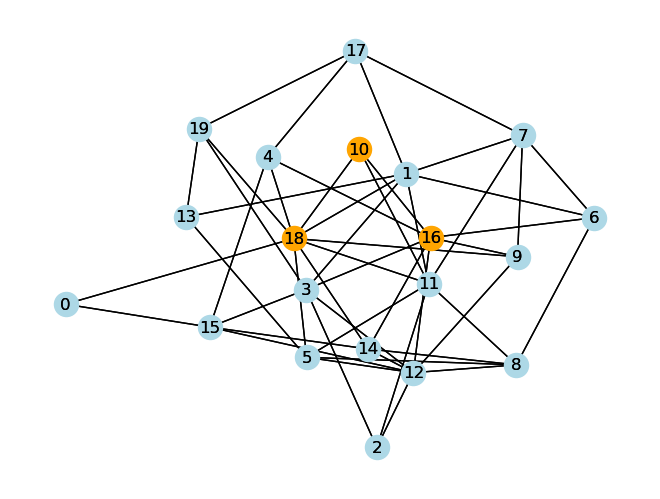

In [113]:
infected_nodes = []
susceptible_nodes = []
for key, label in state_dict.items():
    if label == "I":
        infected_nodes.append(key)
    else:
        susceptible_nodes.append(key)

print(infected_nodes)
print(susceptible_nodes)

pos = nx.spring_layout(G)
nx.draw(G, pos = pos, nodelist = infected_nodes, node_color = "orange", with_labels=True)
nx.draw(G, pos = pos, nodelist=susceptible_nodes, node_color = "lightblue", with_labels=True)
plt.show()


Whole code:

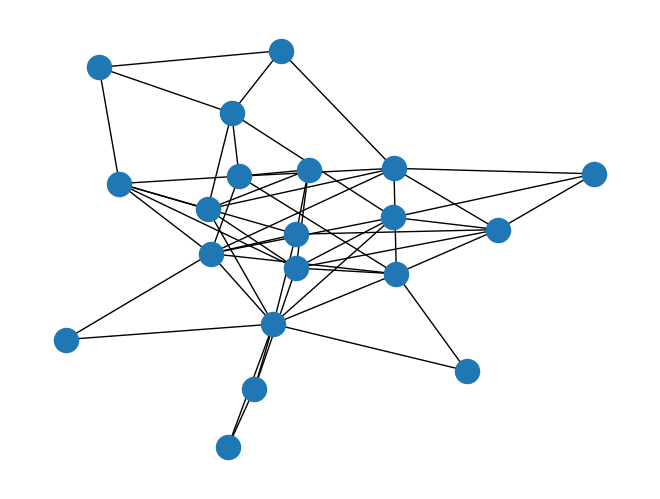

[(0, 'S'), (1, 'S'), (2, 'S'), (3, 'S'), (4, 'S'), (5, 'S'), (6, 'S'), (7, 'S'), (8, 'S'), (9, 'S'), (10, 'S'), (11, 'S'), (12, 'S'), (13, 'S'), (14, 'S'), (15, 'S'), (16, 'S'), (17, 'S'), (18, 'S'), (19, 'S')]
[(0, 'S'), (1, 'S'), (2, 'I'), (3, 'S'), (4, 'S'), (5, 'S'), (6, 'S'), (7, 'S'), (8, 'S'), (9, 'S'), (10, 'S'), (11, 'S'), (12, 'S'), (13, 'S'), (14, 'S'), (15, 'S'), (16, 'S'), (17, 'S'), (18, 'S'), (19, 'S')]
{0: 'S', 1: 'S', 2: 'I', 3: 'S', 4: 'S', 5: 'S', 6: 'S', 7: 'S', 8: 'S', 9: 'S', 10: 'S', 11: 'S', 12: 'S', 13: 'S', 14: 'S', 15: 'S', 16: 'S', 17: 'S', 18: 'S', 19: 'S'}
[2]
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


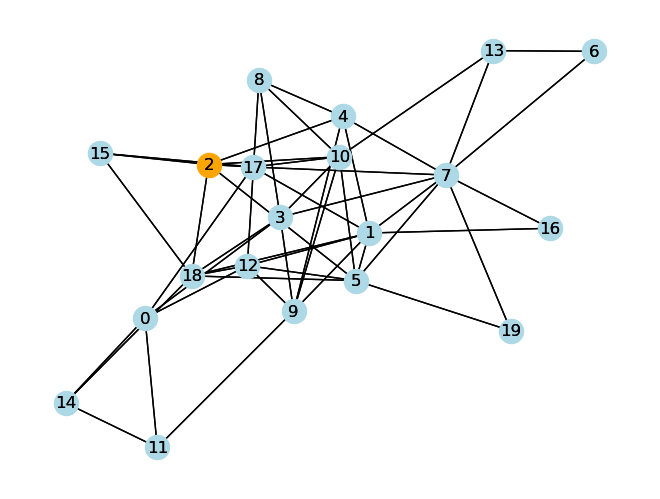

In [159]:
G = nx.gnm_random_graph(n=20, m = 50)

pos = nx.spring_layout(G)
nx.draw(G, pos)
plt.show()
plt.close()

state = []
nodes = G.nodes
for node in nodes:
    state.append((node, "S"))
print(state)
randint = np.random.randint(len(nodes))
state[randint] = (randint, "I")
print(state)
state_dict = dict(state)
print(state_dict)

nx.set_node_attributes(G, state, "state")


infected_nodes = []
susceptible_nodes = []
for key, label in state_dict.items():
    if label == "I":
        infected_nodes.append(key)
    else:
        susceptible_nodes.append(key)

print(infected_nodes)
print(susceptible_nodes)

pos = nx.spring_layout(G)
nx.draw(G, pos = pos, nodelist = infected_nodes, node_color = "orange", with_labels=True)
nx.draw(G, pos = pos, nodelist=susceptible_nodes, node_color = "lightblue", with_labels=True)
plt.show()


[1, 3, 5, 6, 8, 9, 10, 15, 17, 18, 19]
[0, 2, 4, 7, 11, 12, 13, 14, 16]


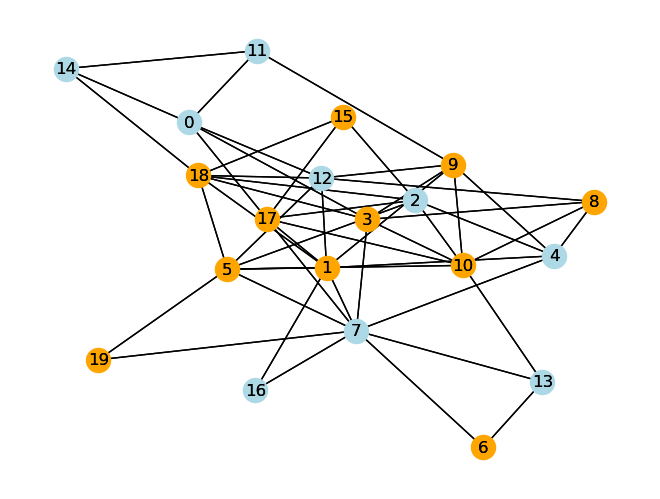

In [160]:
iterations = 100
dictionaries_list = []

beta = 0.5 #probability of being infected by every neightbor that it has
gamma = 0.4 #probability of recovery

#whole update rules
for iters in range(iterations):
    state = nx.get_node_attributes(G, "state")
    new_state = {}
    for node in G.nodes():
        #print(node)
        if state_dict[node] == "I":
            if random.uniform(0, 1) < gamma:
                new_state[node] = "S"
        else:
            #checking the neighbors
            neighbors = list(G.neighbors(node))
            for neighbor in neighbors:
                if state_dict[neighbor] == "I":
                    if random.uniform(0, 1) < beta:
                        new_state[node] = "I"
                        break
    state_dict.update(new_state)
    dictionaries_list.append(state_dict.copy())


infected_nodes = []
susceptible_nodes = []
for key, label in state_dict.items():
    if label == "I":
        infected_nodes.append(key)
    else:
        susceptible_nodes.append(key)

print(infected_nodes)
print(susceptible_nodes)

pos = nx.spring_layout(G)
nx.draw(G, pos = pos, nodelist = infected_nodes, node_color = "orange", with_labels=True)
nx.draw(G, pos = pos, nodelist=susceptible_nodes, node_color = "lightblue", with_labels=True)
plt.show()
    

In [161]:
#we can plot the infected versus recovered people
infected_ppl = []
susceptible_ppl = []
for d in dictionaries_list:
    inf = 0
    sus = 0
    for key, value in d.items():
        if value == "S":
            sus = sus + 1
        else:
            inf = inf + 1
    infected_ppl.append(inf)
    susceptible_ppl.append(sus)

print(infected_ppl) #these are lists of the number of infected vs number of susceptible per iteration
print(susceptible_ppl)

[3, 10, 12, 12, 15, 12, 15, 12, 14, 16, 15, 14, 13, 12, 16, 15, 14, 11, 10, 15, 13, 10, 14, 18, 18, 12, 16, 11, 11, 14, 17, 13, 10, 14, 12, 14, 15, 12, 12, 15, 13, 14, 13, 15, 16, 17, 13, 16, 14, 13, 14, 16, 14, 14, 14, 13, 15, 14, 10, 16, 14, 11, 11, 13, 14, 14, 11, 8, 16, 11, 17, 15, 10, 11, 13, 12, 13, 16, 15, 12, 14, 11, 12, 14, 13, 13, 14, 13, 15, 14, 15, 9, 16, 13, 12, 11, 17, 13, 14, 11]
[17, 10, 8, 8, 5, 8, 5, 8, 6, 4, 5, 6, 7, 8, 4, 5, 6, 9, 10, 5, 7, 10, 6, 2, 2, 8, 4, 9, 9, 6, 3, 7, 10, 6, 8, 6, 5, 8, 8, 5, 7, 6, 7, 5, 4, 3, 7, 4, 6, 7, 6, 4, 6, 6, 6, 7, 5, 6, 10, 4, 6, 9, 9, 7, 6, 6, 9, 12, 4, 9, 3, 5, 10, 9, 7, 8, 7, 4, 5, 8, 6, 9, 8, 6, 7, 7, 6, 7, 5, 6, 5, 11, 4, 7, 8, 9, 3, 7, 6, 9]


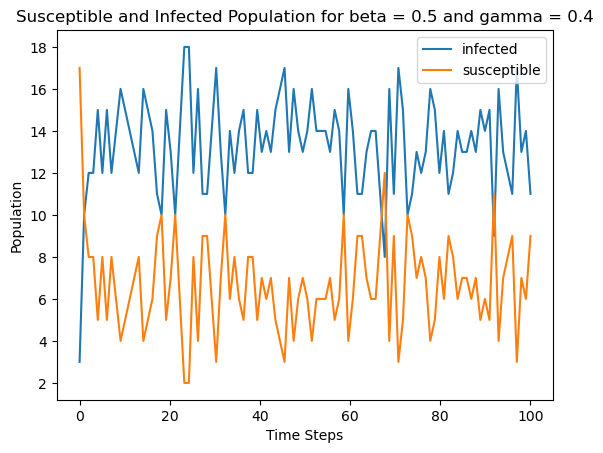

In [164]:
time_arr = np.linspace(0, iterations, iterations)
plt.plot(time_arr, np.array(infected_ppl), label = "infected")
plt.plot(time_arr, np.array(susceptible_ppl), label = "susceptible")
plt.xlabel("Time Steps")
plt.ylabel("Population")
plt.title(f"Susceptible and Infected Population for beta = {beta} and gamma = {gamma}")
plt.legend()
plt.show()

Testing different networks

[0, 1, 2, 4, 5, 6, 7, 8, 10, 12, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 27, 28, 30, 31, 32, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 48, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 77, 78, 79, 81, 82, 84, 86, 87, 88, 89, 93, 94, 95, 96, 97, 98, 102, 103, 104, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 118, 120, 121, 123, 126, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 146, 147, 148, 149, 150, 151, 152, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 177, 179, 181, 186, 187, 188, 189, 192, 193, 194, 196, 197, 198, 199]
[3, 9, 11, 13, 21, 23, 26, 29, 35, 40, 47, 49, 57, 67, 72, 73, 74, 75, 76, 80, 83, 85, 90, 91, 92, 99, 100, 101, 105, 110, 117, 119, 122, 124, 125, 127, 128, 142, 144, 145, 153, 162, 172, 176, 178, 180, 182, 183, 184, 185, 190, 191, 195]


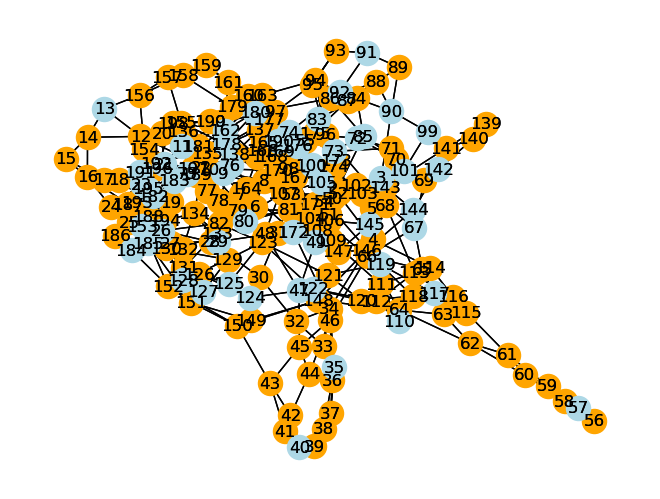

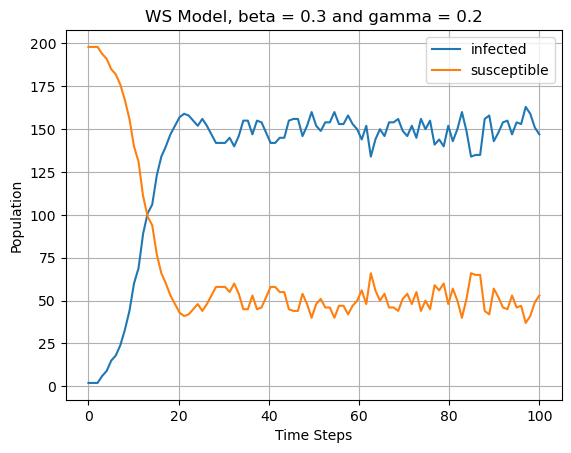

In [190]:
#small world
G = nx.watts_strogatz_graph(n=200, k = 4, p = 0.2)

state = []
nodes = G.nodes
for node in nodes:
    state.append((node, "S"))
randint = np.random.randint(len(nodes))
state[randint] = (randint, "I")
state_dict = dict(state)

nx.set_node_attributes(G, state, "state")

infected_nodes = []
susceptible_nodes = []
for key, label in state_dict.items():
    if label == "I":
        infected_nodes.append(key)
    else:
        susceptible_nodes.append(key)


iterations = 100
dictionaries_list = []

beta = 0.3 #probability of being infected by every neightbor that it has
gamma = 0.2 #probability of recovery

#whole update rules
for iters in range(iterations):
    state = nx.get_node_attributes(G, "state")
    new_state = {}
    for node in G.nodes():
        #print(node)
        if state_dict[node] == "I":
            if random.uniform(0, 1) < gamma:
                new_state[node] = "S"
        else:
            #checking the neighbors
            neighbors = list(G.neighbors(node))
            for neighbor in neighbors:
                if state_dict[neighbor] == "I":
                    if random.uniform(0, 1) < beta:
                        new_state[node] = "I"
                        break
    state_dict.update(new_state)
    dictionaries_list.append(state_dict.copy())


infected_nodes = []
susceptible_nodes = []
for key, label in state_dict.items():
    if label == "I":
        infected_nodes.append(key)
    else:
        susceptible_nodes.append(key)

print(infected_nodes)
print(susceptible_nodes)

pos = nx.spring_layout(G)
nx.draw(G, pos = pos, nodelist = infected_nodes, node_color = "orange", with_labels=True)
nx.draw(G, pos = pos, nodelist=susceptible_nodes, node_color = "lightblue", with_labels=True)
plt.show()
plt.close()

infected_ppl = []
susceptible_ppl = []
for d in dictionaries_list:
    inf = 0
    sus = 0
    for key, value in d.items():
        if value == "S":
            sus = sus + 1
        else:
            inf = inf + 1
    infected_ppl.append(inf)
    susceptible_ppl.append(sus)

time_arr = np.linspace(0, iterations, iterations)
plt.plot(time_arr, np.array(infected_ppl), label = "infected")
plt.plot(time_arr, np.array(susceptible_ppl), label = "susceptible")
plt.xlabel("Time Steps")
plt.ylabel("Population")
plt.title(f"WS Model, beta = {beta} and gamma = {gamma}")
plt.legend()
plt.grid()
plt.show()
plt.close()

[0, 1, 2, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 36, 38, 43, 44, 47, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 72, 73, 75, 77, 78, 79, 80, 81, 82, 83, 86, 87, 89, 90, 91, 92, 93, 94, 95, 98, 99, 100, 101, 102, 104, 106, 107, 110, 111, 113, 115, 116, 118, 120, 121, 122, 125, 126, 128, 129, 131, 132, 133, 134, 135, 136, 138, 139, 140, 142, 143, 144, 146, 147, 148, 149, 152, 153, 154, 155, 156, 157, 160, 161, 163, 164, 165, 167, 171, 173, 176, 178, 179, 180, 182, 183, 184, 185, 188, 189, 190, 192, 193, 194, 196, 198]
[3, 7, 8, 16, 18, 31, 33, 34, 35, 37, 39, 40, 41, 42, 45, 46, 48, 56, 59, 68, 71, 74, 76, 84, 85, 88, 96, 97, 103, 105, 108, 109, 112, 114, 117, 119, 123, 124, 127, 130, 137, 141, 145, 150, 151, 158, 159, 162, 166, 168, 169, 170, 172, 174, 175, 177, 181, 186, 187, 191, 195, 197, 199]


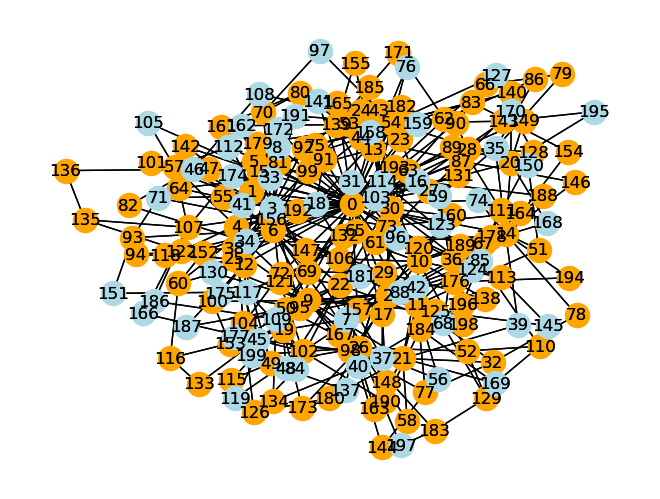

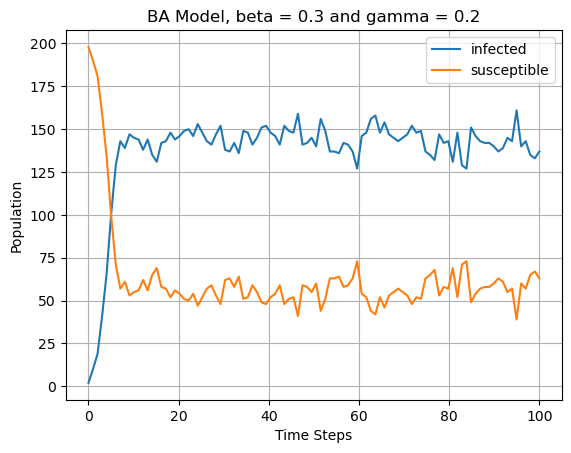

In [191]:
#BA
G = nx.barabasi_albert_graph(n=200, m=2)

state = []
nodes = G.nodes
for node in nodes:
    state.append((node, "S"))
randint = np.random.randint(len(nodes))
state[randint] = (randint, "I")
state_dict = dict(state)

nx.set_node_attributes(G, state, "state")

infected_nodes = []
susceptible_nodes = []
for key, label in state_dict.items():
    if label == "I":
        infected_nodes.append(key)
    else:
        susceptible_nodes.append(key)


iterations = 100
dictionaries_list = []

beta = 0.3 #probability of being infected by every neightbor that it has
gamma = 0.2 #probability of recovery

#whole update rules
for iters in range(iterations):
    state = nx.get_node_attributes(G, "state")
    new_state = {}
    for node in G.nodes():
        #print(node)
        if state_dict[node] == "I":
            if random.uniform(0, 1) < gamma:
                new_state[node] = "S"
        else:
            #checking the neighbors
            neighbors = list(G.neighbors(node))
            for neighbor in neighbors:
                if state_dict[neighbor] == "I":
                    if random.uniform(0, 1) < beta:
                        new_state[node] = "I"
                        break
    state_dict.update(new_state)
    dictionaries_list.append(state_dict.copy())


infected_nodes = []
susceptible_nodes = []
for key, label in state_dict.items():
    if label == "I":
        infected_nodes.append(key)
    else:
        susceptible_nodes.append(key)

print(infected_nodes)
print(susceptible_nodes)

pos = nx.spring_layout(G)
nx.draw(G, pos = pos, nodelist = infected_nodes, node_color = "orange", with_labels=True)
nx.draw(G, pos = pos, nodelist=susceptible_nodes, node_color = "lightblue", with_labels=True)
plt.show()
plt.close()

infected_ppl = []
susceptible_ppl = []
for d in dictionaries_list:
    inf = 0
    sus = 0
    for key, value in d.items():
        if value == "S":
            sus = sus + 1
        else:
            inf = inf + 1
    infected_ppl.append(inf)
    susceptible_ppl.append(sus)

time_arr = np.linspace(0, iterations, iterations)
plt.plot(time_arr, np.array(infected_ppl), label = "infected")
plt.plot(time_arr, np.array(susceptible_ppl), label = "susceptible")
plt.xlabel("Time Steps")
plt.ylabel("Population")
plt.title(f"BA Model, beta = {beta} and gamma = {gamma}")
plt.legend()
plt.grid()
plt.show()
plt.close()

adding a recovered population

{0: 'S', 1: 'S', 2: 'S', 3: 'S', 4: 'S', 5: 'S', 6: 'S', 7: 'S', 8: 'S', 9: 'S', 10: 'S', 11: 'S', 12: 'S', 13: 'S', 14: 'S', 15: 'S', 16: 'S', 17: 'I', 18: 'S', 19: 'S'}
[17]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19]


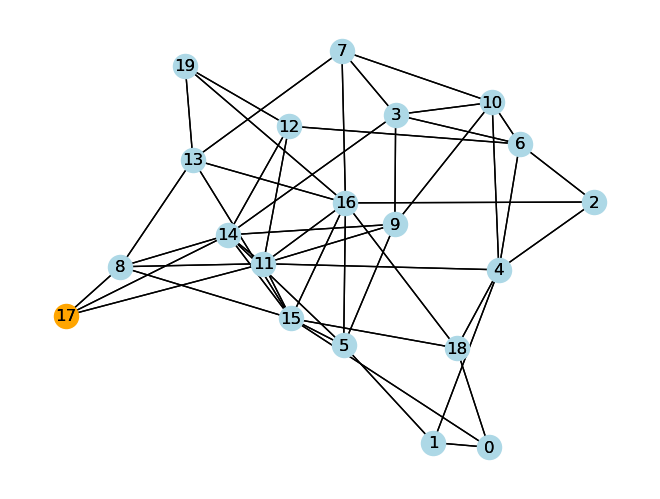

In [171]:
Gr = nx.gnm_random_graph(n=20, m = 50)

state = []
nodes = Gr.nodes
for node in nodes:
    state.append((node, "S"))

randint = np.random.randint(len(nodes))
state[randint] = (randint, "I")
state_dict = dict(state)
print(state_dict)

nx.set_node_attributes(Gr, state, "state")

infected_nodes = []
susceptible_nodes = []
for key, label in state_dict.items():
    if label == "I":
        infected_nodes.append(key)
    else:
        susceptible_nodes.append(key)

print(infected_nodes)
print(susceptible_nodes)

pos = nx.spring_layout(Gr)
nx.draw(Gr, pos = pos, nodelist = infected_nodes, node_color = "orange", with_labels=True)
nx.draw(Gr, pos = pos, nodelist=susceptible_nodes, node_color = "lightblue", with_labels=True)
plt.show()


[1, 2, 3, 4, 5, 6, 9, 10, 12, 13, 14, 15, 16, 17, 19]
[0, 7, 8, 11, 18]


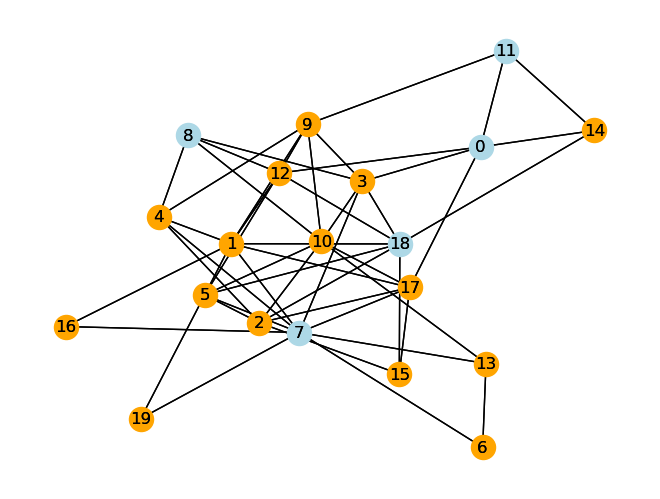

In [172]:
iterations = 100
dictionaries_list = []

beta = 0.5 #probability of being infected by every neightbor that it has
gamma = 0.4 #probability of recovery

#whole update rules
for iters in range(iterations):
    state = nx.get_node_attributes(G, "state")
    new_state = {}
    for node in G.nodes():
        #print(node)
        if state_dict[node] == "I":
            if random.uniform(0, 1) < gamma:
                new_state[node] = "S"
        elif state_dict[node] == "S":
            #checking the neighbors
            neighbors = list(G.neighbors(node))
            for neighbor in neighbors:
                if state_dict[neighbor] == "I":
                    if random.uniform(0, 1) < beta:
                        new_state[node] = "I"
                        break
    state_dict.update(new_state)
    dictionaries_list.append(state_dict.copy())


infected_nodes = []
susceptible_nodes = []
for key, label in state_dict.items():
    if label == "I":
        infected_nodes.append(key)
    else:
        susceptible_nodes.append(key)

print(infected_nodes)
print(susceptible_nodes)

pos = nx.spring_layout(G)
nx.draw(G, pos = pos, nodelist = infected_nodes, node_color = "orange", with_labels=True)
nx.draw(G, pos = pos, nodelist=susceptible_nodes, node_color = "lightblue", with_labels=True)
plt.show()